# Importing necessary library

In [1]:
import sys
sys.path.insert(0, '../src')
from terminal_script import read_data
from terminal_script import plot_top_10_by_state
from terminal_script import two_sample_t_test
from terminal_script import t_test_against_others
from terminal_script import t_test_weather_quan
from terminal_script import t_test_weather_city
from terminal_script import airline_t_test
import importlib
importlib.reload(sys.modules['terminal_script'])

<module 'terminal_script' from '../src/terminal_script.py'>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Rolling 12-months data

In [3]:
df_02 = read_data('../data/2019_02_ALL.csv')
df_03 = read_data('../data/2019_03_ALL.csv')
df_04 = read_data('../data/2019_04_ALL.csv')
df_05 = read_data('../data/2019_05_ALL.csv')
df_06 = read_data('../data/2019_06_ALL.csv')
df_07 = read_data('../data/2019_07_ALL.csv')
df_08 = read_data('../data/2019_08_ALL.csv')
df_09 = read_data('../data/2019_09_ALL.csv')
df_10 = read_data('../data/2019_10_ALL.csv')
df_11 = read_data('../data/2019_11_ALL.csv')
df_12 = read_data('../data/2019_12_ALL.csv')
df_01 = read_data('../data/2020_01_ALL.csv')

In [4]:
frames = [df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_01]

In [5]:
df_one_year = pd.concat(frames)

In [34]:
df_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7445398 entries, 0 to 607345
Data columns (total 26 columns):
ARR_DELAY            float64
ARR_DELAY_NEW        float64
ARR_TIME             float64
CANCELLED            float64
CRS_ARR_TIME         int64
CRS_DEP_TIME         int64
DEP_DELAY            float64
DEP_DELAY_NEW        float64
DEP_TIME             float64
DEST                 object
DEST_AIRPORT_ID      int64
DEST_CITY_NAME       object
DEST_STATE_ABR       object
DISTANCE             float64
FL_DATE              object
MONTH                int64
OP_CARRIER_FL_NUM    int64
OP_UNIQUE_CARRIER    object
ORIGIN               object
ORIGIN_AIRPORT_ID    int64
ORIGIN_CITY_NAME     object
ORIGIN_STATE_ABR     object
QUARTER              int64
Unnamed: 22          float64
Unnamed: 24          float64
YEAR                 int64
dtypes: float64(10), int64(8), object(8)
memory usage: 1.5+ GB


In [35]:
df_one_year.sample(5)

,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLED,CRS_ARR_TIME,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_TIME,DEST,...,OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,QUARTER,Unnamed: 22,Unnamed: 24,YEAR
184705,-15.0,NaN,1520.0,0.0,1535,1440,-4.0,NaN,1436.0,SAN,...,175,WN,SLC,14869,"Salt Lake City, UT",UT,1,NaN,NaN,2019
5864,-1.0,NaN,1258.0,0.0,1259,1135,8.0,NaN,1143.0,ABQ,...,443,DL,ATL,10397,"Atlanta, GA",GA,2,NaN,NaN,2019
623147,-19.0,NaN,2111.0,0.0,2130,1940,-4.0,NaN,1936.0,BHM,...,6368,YV,IAH,12266,"Houston, TX",TX,4,NaN,NaN,2019
519315,18.0,NaN,1338.0,0.0,1320,1050,28.0,NaN,1118.0,DCA,...,1380,B6,FLL,11697,"Fort Lauderdale, FL",FL,4,NaN,NaN,2019
225339,-8.0,NaN,932.0,0.0,940,811,-6.0,NaN,805.0,DFW,...,1572,AA,TUL,15370,"Tulsa, OK",OK,1,NaN,NaN,2019


In [44]:
df_one_year['ORIGIN_CITY_NAME'].nunique()

354

In [197]:
df_one_year['ORIGIN_CITY_NAME'].value_counts().head(20)

Chicago, IL              422539
Atlanta, GA              396044
Dallas/Fort Worth, TX    305620
New York, NY             298601
Denver, CO               253917
Houston, TX              240218
Charlotte, NC            236391
Los Angeles, CA          219763
Washington, DC           208215
Phoenix, AZ              181647
San Francisco, CA        170913
Las Vegas, NV            164997
Detroit, MI              162791
Minneapolis, MN          161209
Boston, MA               151316
Seattle, WA              144210
Orlando, FL              143869
Newark, NJ               136974
Philadelphia, PA         118903
Salt Lake City, UT       115987
Name: ORIGIN_CITY_NAME, dtype: int64

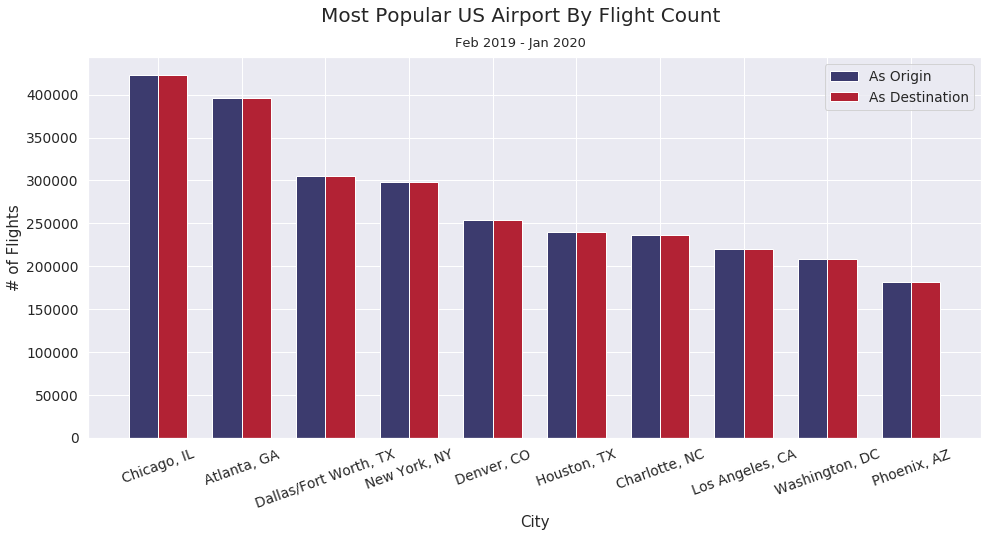

In [48]:
colorhex1 = '#3C3B6E'
colorhex2 =  '#B22234'

fig, ax = plt.subplots(figsize=(16,7))
index = np.arange(0,10)
bar_width = 0.35
most_popular_index = df_one_year['ORIGIN_CITY_NAME'].value_counts().head(10).index
height1 = df_one_year['ORIGIN_CITY_NAME'].value_counts().head(10)
height2 = df_one_year['DEST_CITY_NAME'].value_counts().head(10)
origin = ax.bar(index, height1, bar_width, color = colorhex1)
destination = ax.bar(index+bar_width, height2, bar_width, color = colorhex2)

origin.set_label('As Origin')
destination.set_label('As Destination')

ax.set_xlabel('City')
ax.set_xticklabels(most_popular_index)
ax.set_xticks(index + bar_width / 2)
ax.set_ylabel('# of Flights')
ax.legend()
plt.xticks(rotation=20)
plt.figtext(.5,.95,f'Most Popular US Airport By Flight Count', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020',fontsize=13,ha='center')
plt.savefig('../img/most_popular_airport_US.png', bbox_inches = "tight")

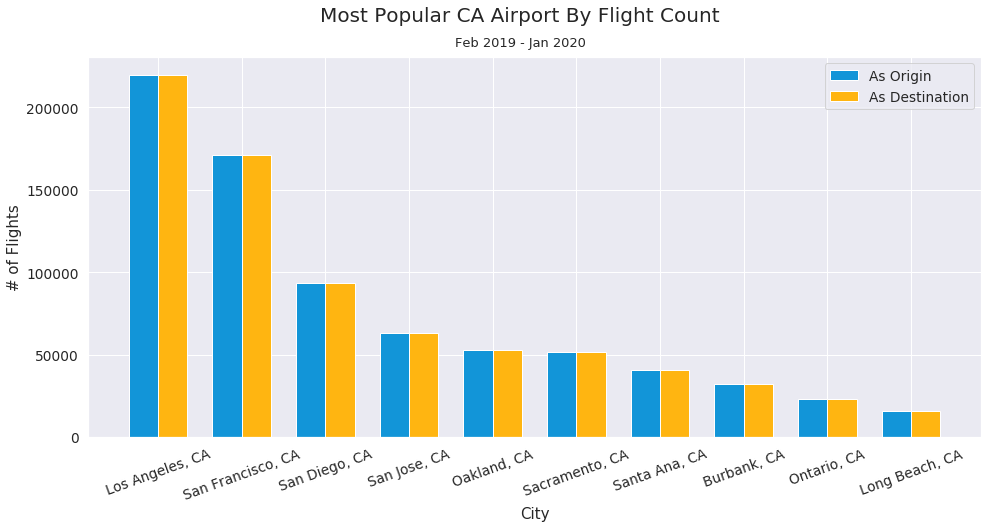

In [51]:
state_abr = 'CA'
colorhex1 = '#1295D8'
colorhex2 =  '#FFB511'

fig, ax = plt.subplots(figsize=(16,7))
index = np.arange(0,10)
bar_width = 0.35
most_popular_index = df_one_year[(df_one_year['ORIGIN_STATE_ABR'] == state_abr)]['ORIGIN_CITY_NAME'].value_counts().head(10).index
height1 = df_one_year[(df_one_year['ORIGIN_STATE_ABR'] == state_abr)]['ORIGIN_CITY_NAME'].value_counts().head(10)
height2 = df_one_year[(df_one_year['DEST_STATE_ABR'] == state_abr)]['DEST_CITY_NAME'].value_counts().head(10)
origin = ax.bar(index, height1, bar_width, color = colorhex1)
destination = ax.bar(index+bar_width, height2, bar_width, color = colorhex2)

origin.set_label('As Origin')
destination.set_label('As Destination')

ax.set_xlabel('City')
ax.set_xticklabels(most_popular_index)
ax.set_xticks(index + bar_width / 2)
ax.set_ylabel('# of Flights')
ax.legend()
plt.xticks(rotation=20)
plt.figtext(.5,.95,f'Most Popular {state_abr} Airport By Flight Count', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020',fontsize=13,ha='center')
plt.savefig('../img/most_popular_airport_CA.png', bbox_inches = "tight")

#### Cancellation

In [53]:
cancelled_flight = df_one_year.groupby(['ORIGIN_CITY_NAME','ORIGIN_STATE_ABR']).agg(
    total_flight=pd.NamedAgg(column='CANCELLED',aggfunc='count'),
    cancelled_count=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
    avg_dist=pd.NamedAgg(column='DISTANCE',aggfunc='mean')
)
cancelled_flight['cancelled_rate'] = cancelled_flight['cancelled_count'] / cancelled_flight['total_flight']
cancelled_flight = cancelled_flight.reset_index()

In [119]:
cancelled_flight

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,total_flight,cancelled_count,avg_dist,cancelled_rate
0,"Aberdeen, SD",SD,750,18.0,257.000000,0.024000
1,"Abilene, TX",TX,2270,41.0,158.000000,0.018062
2,"Adak Island, AK",AK,104,6.0,1192.000000,0.057692
3,"Aguadilla, PR",PR,2303,22.0,1246.702128,0.009553
4,"Akron, OH",OH,6261,155.0,471.334451,0.024756
...,...,...,...,...,...,...
349,"Wilmington, NC",NC,6902,136.0,358.443929,0.019704
350,"Worcester, MA",MA,1265,22.0,786.577075,0.017391
351,"Wrangell, AK",AK,724,14.0,56.500000,0.019337
352,"Yakutat, AK",AK,722,24.0,205.500000,0.033241


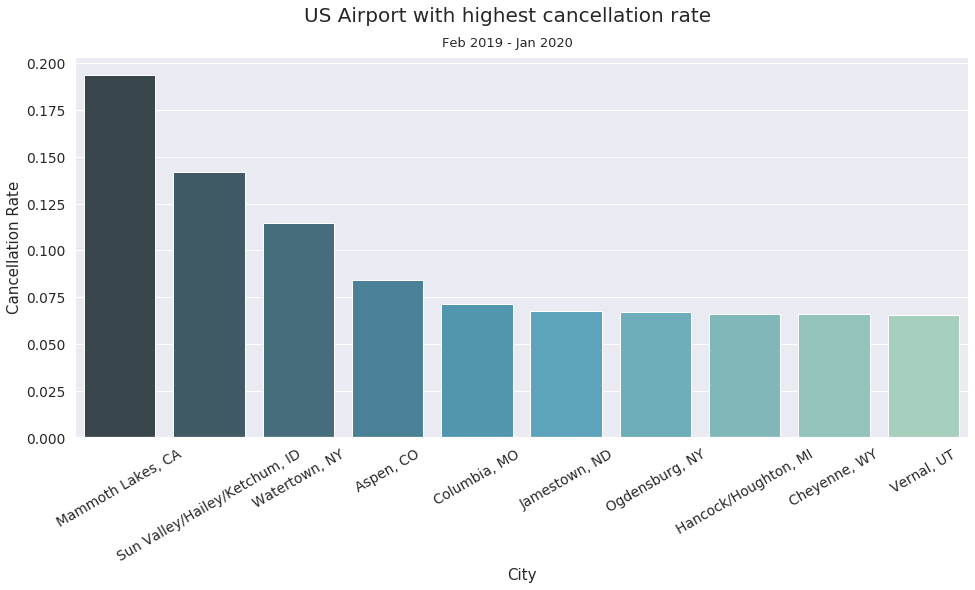

In [60]:
cancelled_flight_ = cancelled_flight.sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight_[0:10],palette='GnBu_d')
ax.set_xlabel('City')
ax.set_ylabel('Cancellation Rate')
plt.xticks(rotation=30, ha='center')
plt.figtext(.5,.95,'US Airport with highest cancellation rate', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/highest_cancellation_rate_US.png', bbox_inches = "tight")

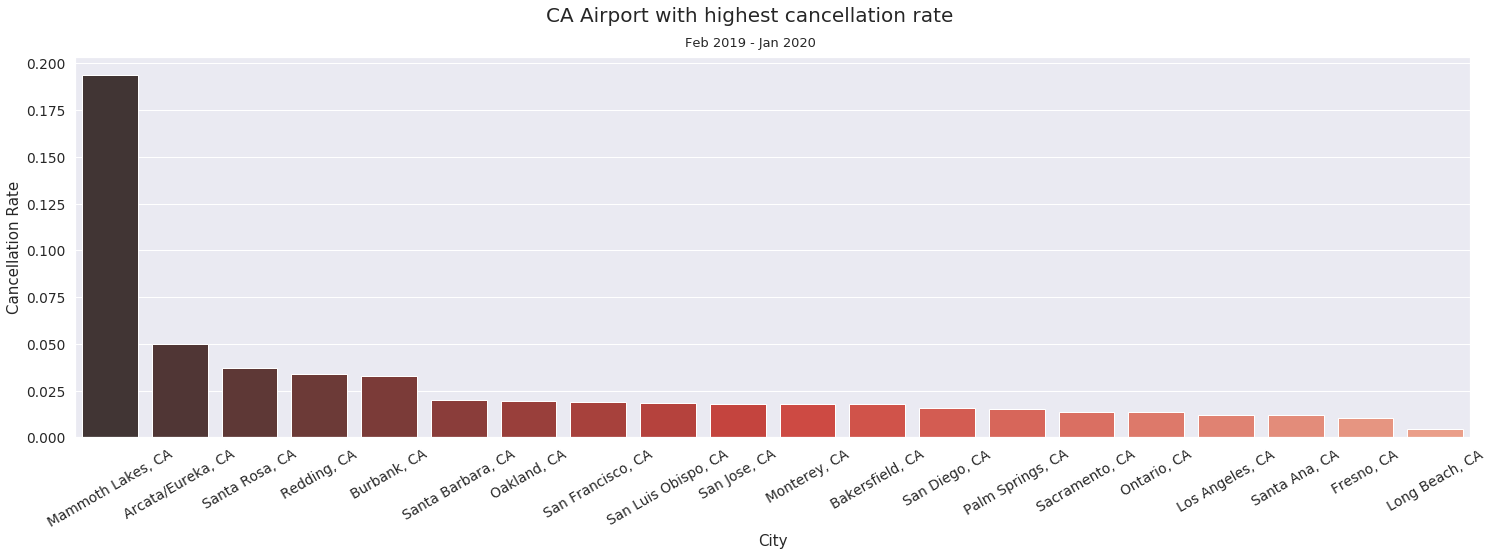

In [62]:
cancelled_flight_ = cancelled_flight[cancelled_flight['ORIGIN_STATE_ABR'] == "CA"].sort_values(by='cancelled_rate',ascending=False)
fig, ax = plt.subplots(figsize=(25,7))
sns.set(font_scale=1.25)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='cancelled_rate',data=cancelled_flight_[0:20],palette='Reds_d')
ax.set_xlabel('City')
ax.set_ylabel('Cancellation Rate')
plt.xticks(rotation=30,horizontalalignment='center')
plt.figtext(.5,.95,'CA Airport with highest cancellation rate', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/highest_cancellation_rate_CA.png', bbox_inches = "tight")

In [92]:
cancelled_flight.describe()

,total_flight,cancelled_count,avg_dist,cancelled_rate
count,354.000000,354.000000,354.000000,354.000000
mean,21032.197740,353.466102,524.572816,0.022190
std,53639.868509,1019.250144,308.196688,0.018668
min,37.000000,0.000000,41.000000,0.000000
25%,959.500000,23.000000,300.863924,0.012304
50%,3103.000000,56.000000,470.060843,0.018558
75%,12182.750000,219.000000,689.985623,0.027013
max,422539.000000,11362.000000,2599.000000,0.193662


In [320]:
cancelled_flight.corr()

,total_flight,cancelled_count,avg_dist,cancelled_rate
total_flight,1.000000,0.907431,0.352114,-0.113411
cancelled_count,0.907431,1.000000,0.281797,-0.032271
avg_dist,0.352114,0.281797,1.000000,-0.261759
cancelled_rate,-0.113411,-0.032271,-0.261759,1.000000


In [94]:
busy_half = cancelled_flight[cancelled_flight['total_flight'] >= 3103]
inactive_half = cancelled_flight[cancelled_flight['total_flight'] < 3103]

In [95]:
busy_half.corr()

,total_flight,cancelled_count,avg_dist,cancelled_rate
total_flight,1.000000,0.896917,0.414661,-0.074700
cancelled_count,0.896917,1.000000,0.314031,0.099161
avg_dist,0.414661,0.314031,1.000000,-0.414405
cancelled_rate,-0.074700,0.099161,-0.414405,1.000000


In [96]:
inactive_half.corr()

,total_flight,cancelled_count,avg_dist,cancelled_rate
total_flight,1.000000,0.549305,-0.037571,-0.091385
cancelled_count,0.549305,1.000000,-0.129582,0.633602
avg_dist,-0.037571,-0.129582,1.000000,-0.139573
cancelled_rate,-0.091385,0.633602,-0.139573,1.000000


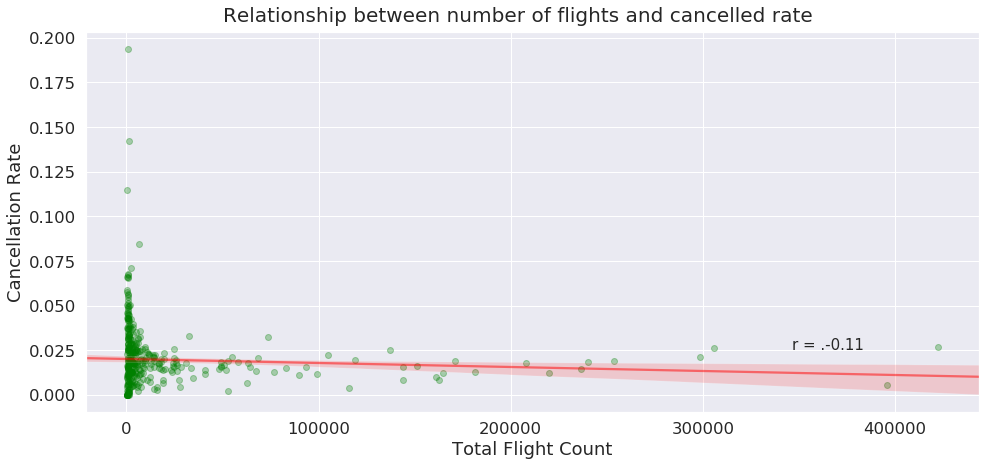

In [324]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='cancelled_rate',data=cancelled_flight,robust=True, scatter_kws = {'color': 'green', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total Flight Count')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Relationship between number of flights and cancelled rate', fontsize=20, ha='center')
plt.figtext(.8,.25,'r = .-0.11', fontsize=15, ha='right')
plt.savefig('../img/flight_count_cancel_rate_US.png', bbox_inches = "tight")

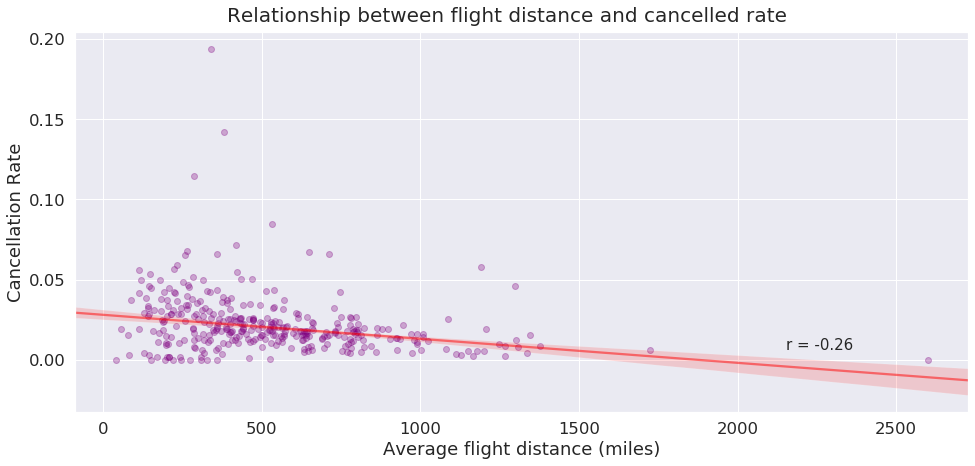

In [325]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='avg_dist',y='cancelled_rate',data=cancelled_flight,robust=True, scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Average flight distance (miles)')
ax.set_ylabel('Cancellation Rate')
plt.figtext(.5,.9,'Relationship between flight distance and cancelled rate', fontsize=20, ha='center')
plt.figtext(.8,.25,'r = -0.26', fontsize=15, ha='right')
plt.savefig('../img/flight_dist_cancel_rate_US.png', bbox_inches = "tight")

#### Delay

In [69]:
flight_delay = df_one_year.groupby(['ORIGIN_CITY_NAME','ORIGIN_STATE_ABR']).agg(
    total_flight=pd.NamedAgg(column='DEP_DELAY',aggfunc='count'),
    avg_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='mean'),
    avg_dist=pd.NamedAgg(column='DISTANCE',aggfunc='mean'),
    med_delay_min=pd.NamedAgg(column='DEP_DELAY',aggfunc='median'),
    med_dist=pd.NamedAgg(column='DISTANCE',aggfunc='median')
).reset_index()

In [328]:
flight_delay.describe()

,total_flight,avg_delay_min,avg_dist,med_delay_min,med_dist
count,354.000000,354.000000,354.000000,354.000000,354.000000
mean,20691.932203,10.304992,524.572816,-4.228814,468.631356
std,52756.857645,5.964073,308.196688,2.465895,298.705273
min,37.000000,-7.940666,41.000000,-15.000000,41.000000
25%,934.500000,7.581765,300.863924,-5.000000,241.000000
50%,3049.500000,9.988003,470.060843,-4.000000,430.000000
75%,12074.000000,13.066916,689.985623,-3.000000,620.000000
max,411619.000000,34.507003,2599.000000,8.000000,2599.000000


In [329]:
flight_delay.corr()

,total_flight,avg_delay_min,avg_dist,med_delay_min,med_dist
total_flight,1.000000,0.021044,0.352785,0.320728,0.285561
avg_delay_min,0.021044,1.000000,0.030804,0.401604,0.135876
avg_dist,0.352785,0.030804,1.000000,0.428978,0.850164
med_delay_min,0.320728,0.401604,0.428978,1.000000,0.413663
med_dist,0.285561,0.135876,0.850164,0.413663,1.000000


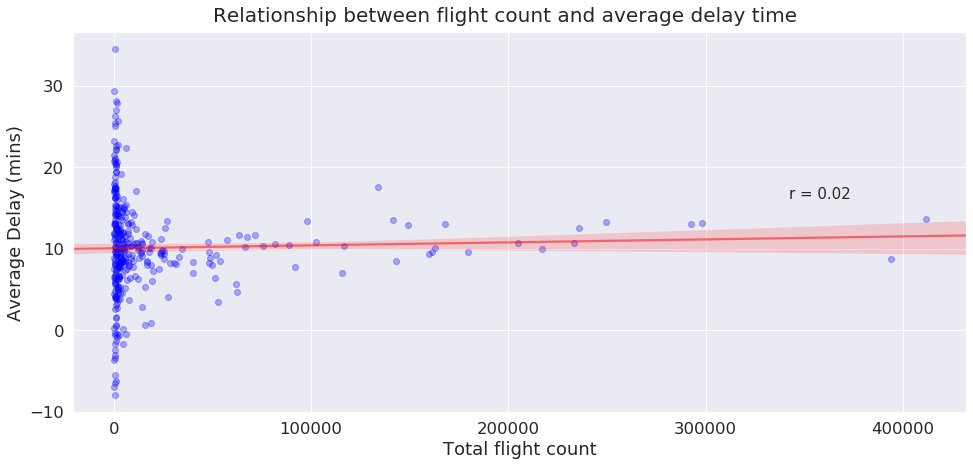

In [330]:
# Total flight vs Avg Delay
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='avg_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total flight count')
ax.set_ylabel('Average Delay (mins)')
plt.figtext(.5,.9,'Relationship between flight count and average delay time', fontsize=20, ha='center')
plt.figtext(.8,.55,'r = 0.02', fontsize=15, ha='right')
plt.savefig('../img/flight_count_avg_delay_corr.png', bbox_inches = "tight")

Text(0.8, 0.7, 'r = 0.32')

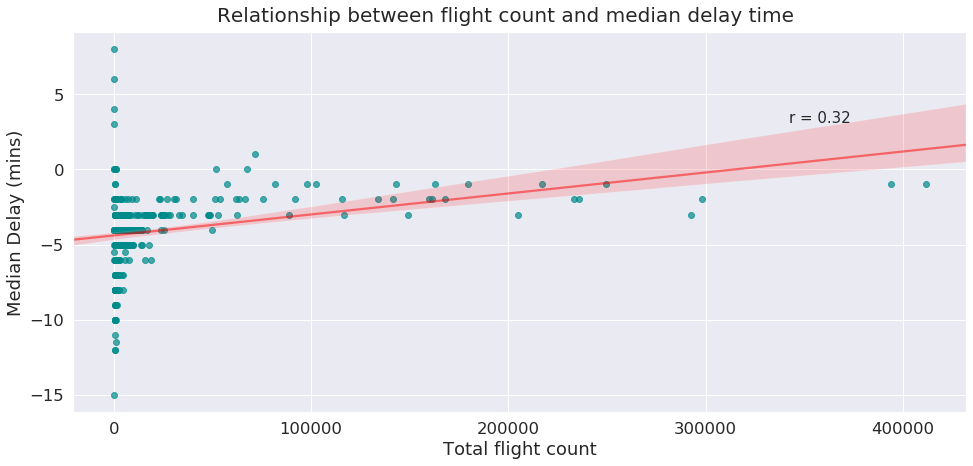

In [15]:
# Total flight vs Med Delay
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='total_flight',y='med_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'darkcyan', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Total flight count')
ax.set_ylabel('Median Delay (mins)')
plt.figtext(.5,.9,'Relationship between flight count and median delay time', fontsize=20, ha='center')
plt.figtext(.8,.7,'r = 0.32', fontsize=15, ha='right')
# fig.savefig('img/flight_count_med_delay_corr.png')

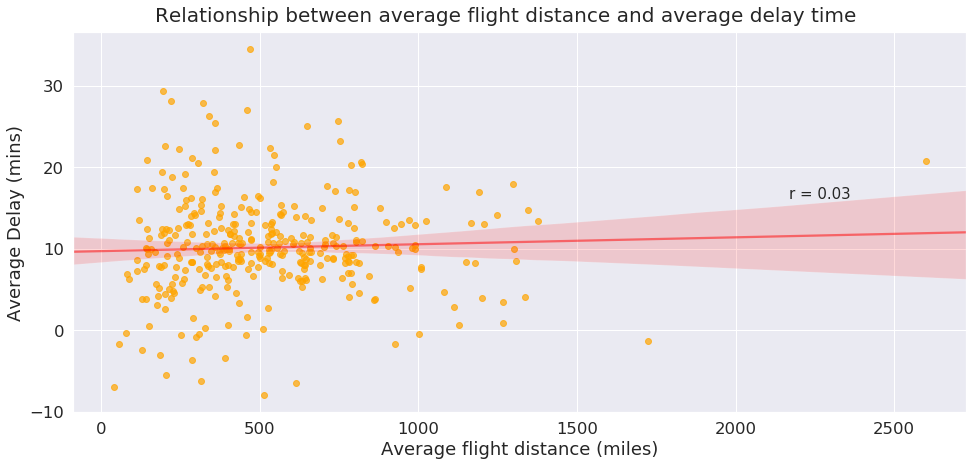

In [331]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='avg_dist',y='avg_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'orange', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Average flight distance (miles)')
ax.set_ylabel('Average Delay (mins)')
plt.figtext(.5,.9,'Relationship between average flight distance and average delay time', fontsize=20, ha='center')
plt.figtext(.8,.55,'r = 0.03', fontsize=15, ha='right')
plt.savefig('../img/avg_flight_dist_avg_delay_corr.png', bbox_inches = "tight")

Text(0.8, 0.75, 'r = 0.41')

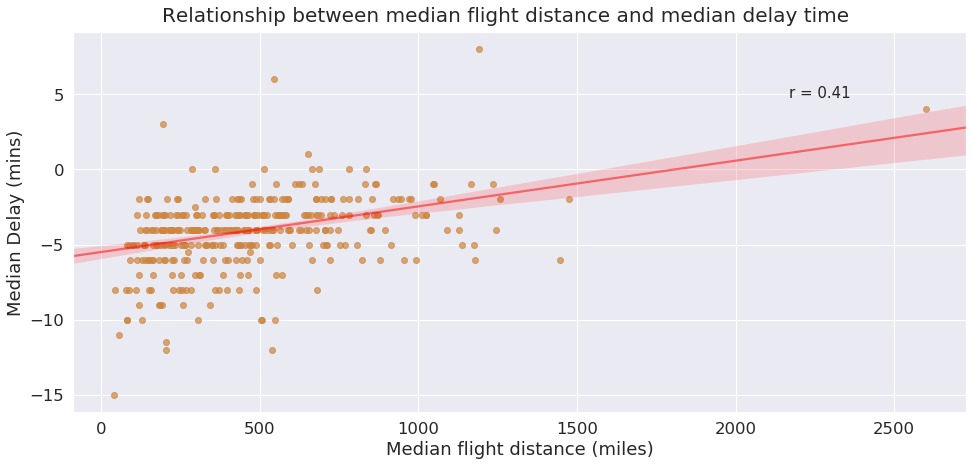

In [19]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.5)
ax = sns.regplot(x='med_dist',y='med_delay_min',data=flight_delay,robust=True, scatter_kws = {'color': 'peru', 'alpha': 0.7}, line_kws = {'color': 'red', 'alpha':0.5})
ax.set_xlabel('Median flight distance (miles)')
ax.set_ylabel('Median Delay (mins)')
plt.figtext(.5,.9,'Relationship between median flight distance and median delay time', fontsize=20, ha='center')
plt.figtext(.8,.75,'r = 0.41', fontsize=15, ha='right')
# fig.savefig('img/avg_flight_dist_avg_delay_corr.png')

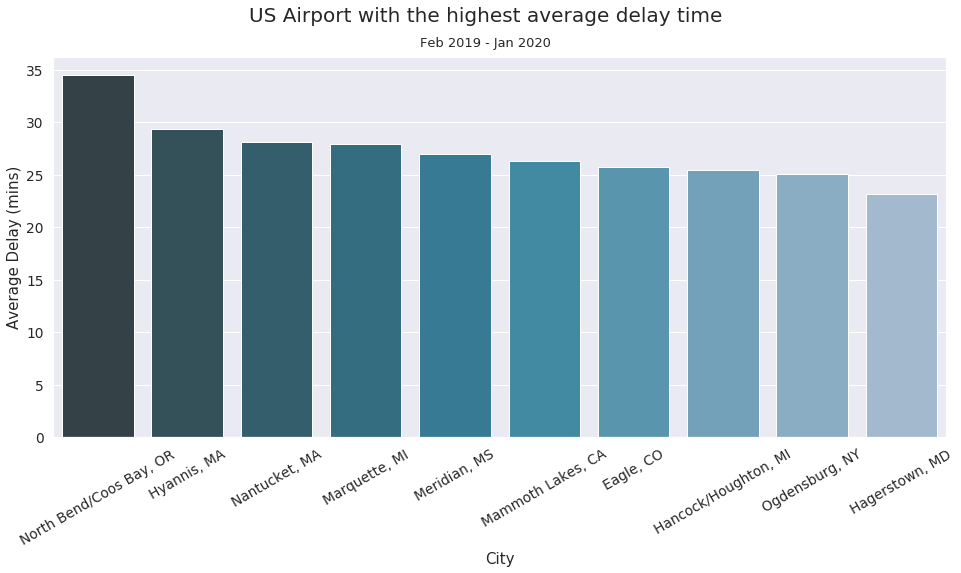

In [66]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay.sort_values(by='avg_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_[0:10],palette='PuBuGn_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=30)
plt.figtext(.5,.95,'US Airport with the highest average delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/highest_avg_delay_US.png', bbox_inches = "tight")

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

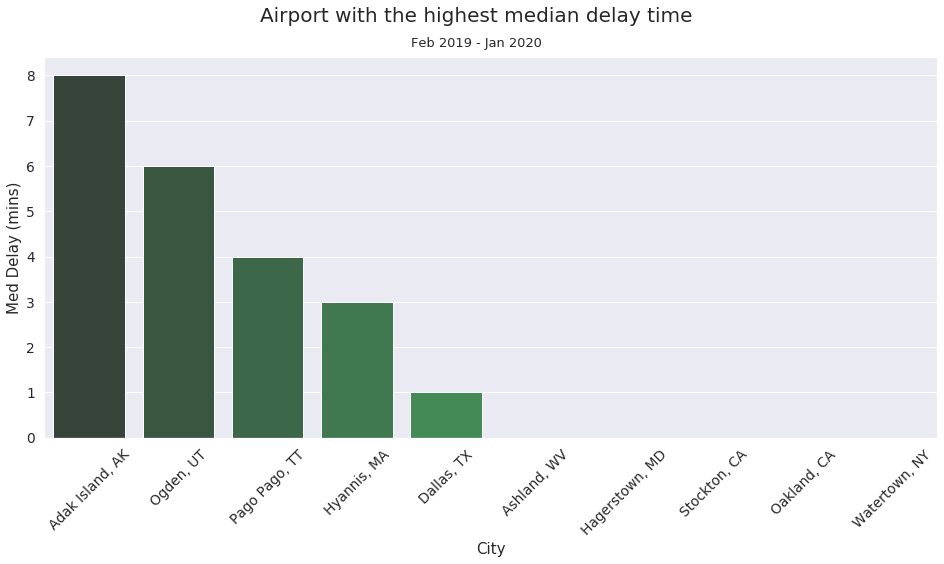

In [24]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay.sort_values(by='med_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='med_delay_min',data=flight_delay_[0:10],palette='Greens_d')

ax.set_xlabel('City')
ax.set_ylabel('Med Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'Airport with the highest median delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

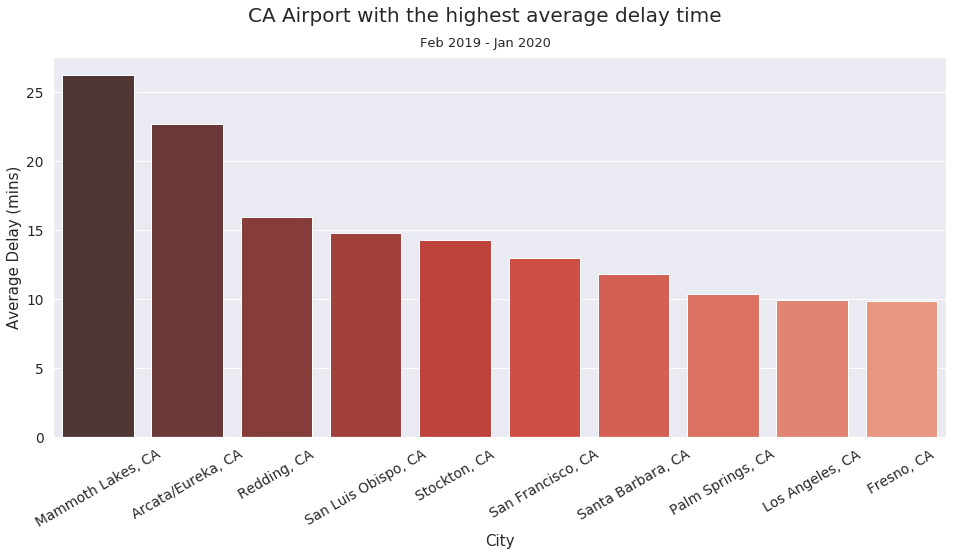

In [72]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_STATE_ABR'] == 'CA'].sort_values(by='avg_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_[0:10],palette='Reds_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=30)
plt.figtext(.5,.95,'CA Airport with the highest average delay time', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/highest_avg_delay_CA.png', bbox_inches = "tight")

Text(0.5, 0.9, 'Feb 2019 - Jan 2020')

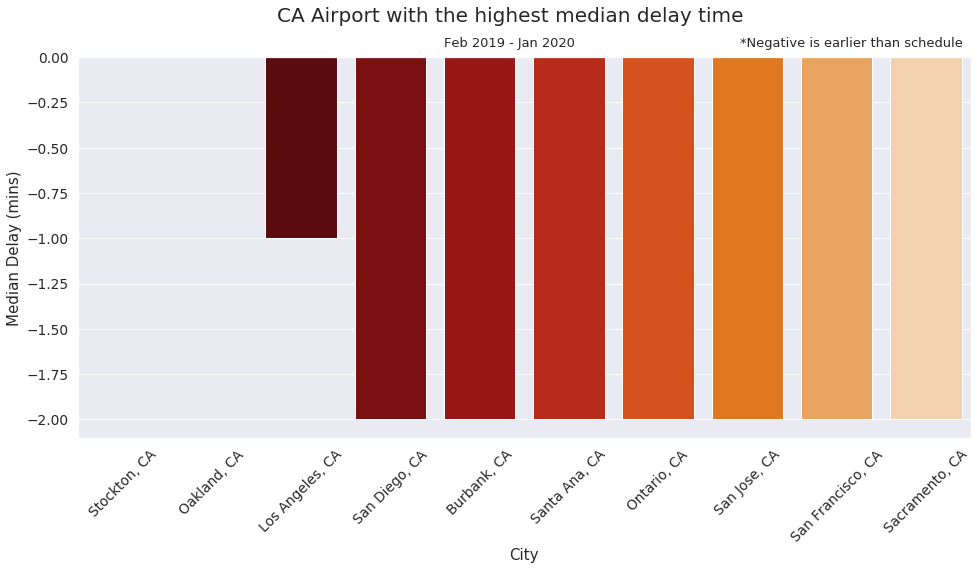

In [44]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_STATE_ABR'] == 'CA'].sort_values(by='med_delay_min',ascending=False)

ax = sns.barplot(x='ORIGIN_CITY_NAME',y='med_delay_min',data=flight_delay_[0:10],palette='gist_heat')
ax.set_xlabel('City')
ax.set_ylabel('Median Delay (mins)')
plt.xticks(rotation=45)
plt.figtext(.5,.95,'CA Airport with the highest median delay time', fontsize=20, ha='center')
plt.figtext(.7,.9,'*Negative is earlier than schedule', fontsize=13, ha='left')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')

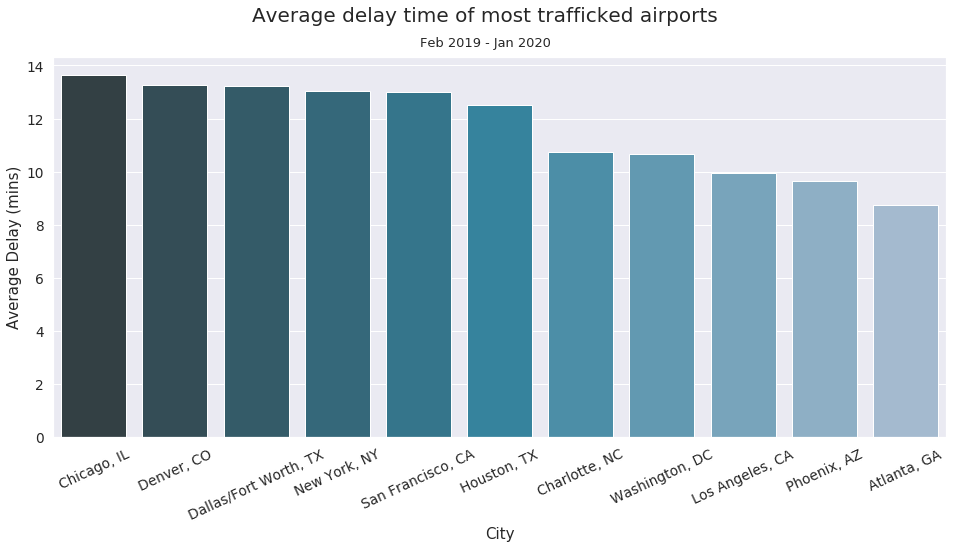

In [79]:
airport_list = [
'Chicago, IL',
'Atlanta, GA',
'Dallas/Fort Worth, TX',
'New York, NY',
'Denver, CO',
'Houston, TX',
'Charlotte, NC',
'Los Angeles, CA',
'Washington, DC',
'Phoenix, AZ',
'San Francisco, CA']

fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.25)

flight_delay_ = flight_delay[flight_delay['ORIGIN_CITY_NAME'].isin(airport_list)].sort_values('avg_delay_min',ascending=False)
ax = sns.barplot(x='ORIGIN_CITY_NAME',y='avg_delay_min',data=flight_delay_,palette='PuBuGn_d')
ax.set_xlabel('City')
ax.set_ylabel('Average Delay (mins)')
plt.xticks(rotation=25)
plt.figtext(.5,.95,'Average delay time of most trafficked airports', fontsize=20, ha='center')
plt.figtext(.5,.9,'Feb 2019 - Jan 2020', fontsize=13, ha='center')
plt.savefig('../img/avg_delay_high_traffic_US.png', bbox_inches = "tight")

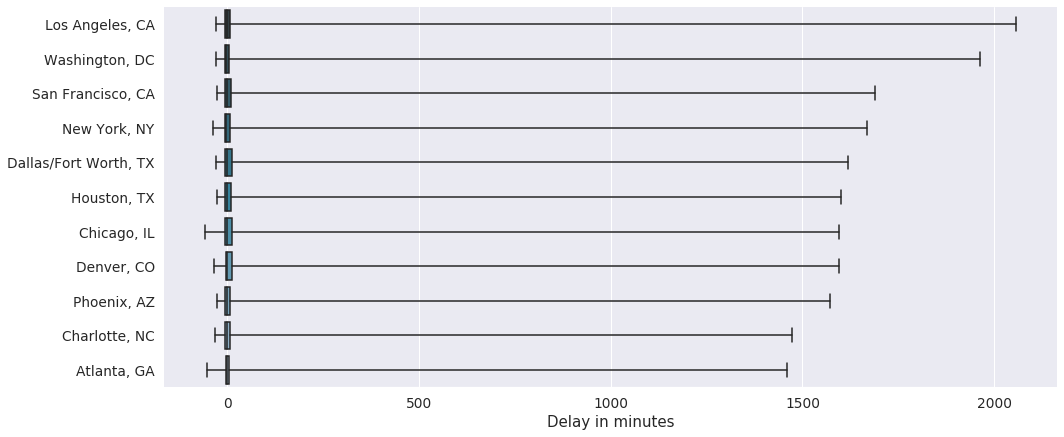

In [353]:
fig, ax = plt.subplots(figsize=(16,7))

flight_delay_all = df_one_year[(df_one_year['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_one_year['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values('DEP_DELAY',ascending=False)


sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=flight_delay_all,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

plt.savefig('../img/delay_dist_full_US.png', bbox_inches = "tight")

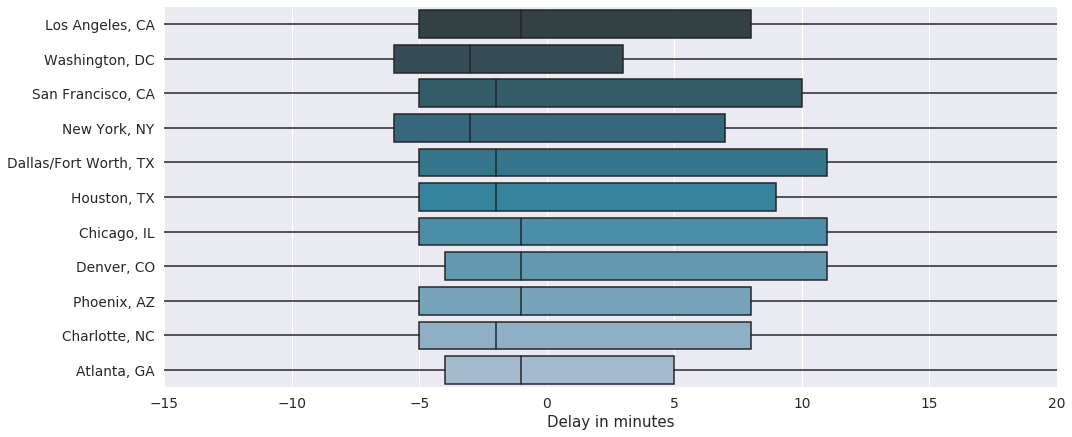

In [354]:
fig, ax = plt.subplots(figsize=(16,7))

flight_delay_all = df_one_year[(df_one_year['ORIGIN_CITY_NAME'].isin(airport_list)) & (df_one_year['DEP_DELAY'].isnull() == False)][['ORIGIN_CITY_NAME','DEP_DELAY']].sort_values('DEP_DELAY',ascending=False)


sns.boxplot(x="DEP_DELAY",y="ORIGIN_CITY_NAME",data=flight_delay_all,whis="range",palette='PuBuGn_d')

ax.xaxis.grid(True)
plt.xlim(-15,20)
ax.set(xlabel="Delay in minutes",ylabel="")
sns.despine(trim=True, left=True)

plt.savefig('../img/delay_dist_zoomed_US.png', bbox_inches = "tight")

# T-Test

In [349]:
SFO_N, OAK_N, SFO_avg, OAK_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'Oakland, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of OAK:{OAK_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of OAK:{OAK_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of OAK:51968
Average delay of SFO:13.01
Average delay of OAK:9.24
Co-variance:0.18
t score:20.64
Two tail p val:0.00
One tail p val:0.00


In [348]:
SFO_N, LAX_N, SFO_avg, LAX_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'Los Angeles, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of LAX:{LAX_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of LAX:{LAX_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of LAX:217173
Average delay of SFO:13.01
Average delay of LAX:9.97
Co-variance:0.15
t score:20.34
Two tail p val:0.00
One tail p val:0.00


In [347]:
SFO_N, SJC_N, SFO_avg, SJC_avg, co_var, t_score, p_val = two_sample_t_test(df_one_year,'San Francisco, CA', 'San Jose, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of SJC:{SJC_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of SJC:{SJC_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of SJC:61970
Average delay of SFO:13.01
Average delay of SJC:5.68
Co-variance:0.18
t score:40.13
Two tail p val:0.00
One tail p val:0.00


In [346]:
SFO_N, ex_SFO_N, SFO_avg, Others_avg, co_var, t_score, p_val = t_test_against_others(df_one_year,'San Francisco, CA', 'DEP_DELAY')
print(f'Sample Size of SFO:{SFO_N}')
print(f'Sample Size of other airports:{ex_SFO_N}')
print(f'Average delay of SFO:{SFO_avg:.2f}')
print(f'Average delay of other airports:{Others_avg:.2f}')
print(f'Co-variance:{co_var:.2f}')
print(f't score:{t_score:.2f}')
print(f'Two tail p val:{p_val:.2f}')
print(f'One tail p val:{p_val/2:.2f}')

Sample Size of SFO:167753
Sample Size of other airports:7157191
Average delay of SFO:13.01
Average delay of other airports:10.57
Co-variance:0.12
t score:20.25
Two tail p val:0.00
One tail p val:0.00


In [344]:
a = df_one_year[(df_one_year['ORIGIN_CITY_NAME'] == 'San Francisco, CA') & (df_one_year['DEP_DELAY'].isnull() == False)]['DEP_DELAY']
b = df_one_year[(df_one_year['ORIGIN_CITY_NAME'] != 'San Francisco, CA') & (df_one_year['DEP_DELAY'].isnull() == False)]['DEP_DELAY']
scs.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=20.250138735764757, pvalue=4.5041974193408615e-91)